<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/LinearRegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Problem 1-5: Scratch Linear Regression
import numpy as np
import matplotlib.pyplot as plt

class ScratchLinearRegression:
    """
    Scratch implementation of Linear Regression (Gradient Descent)
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data
    """

    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=True):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    # problem1:Hypothetical function
    def _linear_hypothesis(self, X):
        """
        Compute linear hypothesis: hθ(X) = X · θ
        """
        return np.dot(X, self.coef_)

    # problem2:Steepest descent
    def _gradient_descent(self, X, y, y_pred):
        """
        Update θ using gradient descent
        θ := θ - α * (1/m) * X.T · (y_pred - y)
        """
        m = X.shape[0]
        error = y_pred - y
        gradient = np.dot(X.T, error) / m
        self.coef_ -= self.lr * gradient

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the model using batch gradient descent.
        If no_bias is False, add a bias term (column of 1s)
        """
        m, n = X.shape

        if not self.no_bias:
            X = np.hstack((np.ones((m, 1)), X))
            if X_val is not None:
                X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

        # Initialize weights θ to zeros
        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            # Hypothesis
            y_pred = self._linear_hypothesis(X)

            # problem 5: Objective function
            self.loss[i] = np.mean((y_pred - y) ** 2) / 2

            if X_val is not None:
                y_val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = np.mean((y_val_pred - y_val) ** 2) / 2

            # Update weights
            self._gradient_descent(X, y, y_pred)

            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Loss = {self.loss[i]}")

    # problem 3:Estimated
    def predict(self, X):
        """
        Predict target values using learned θ
        """
        if not self.no_bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self._linear_hypothesis(X)

# problem 4:Mean squared error
def MSE(y_pred, y_true):
    """
    Mean Squared Error: (1/m) * Σ(y_pred - y)^2
    """
    return np.mean((y_pred - y_true) ** 2)



In [18]:
# Problem 6: Learning and Estimation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading dataset (Ames Housing data)

from google.colab import files
uploaded = files.upload()

data = pd.read_csv("train.csv")

# Using GrLivArea and YearBuilt
X = data[['GrLivArea', 'YearBuilt']].values
y = data['SalePrice'].values

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train-validation
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Training Scratch Linear Regression
scratch_lr = ScratchLinearRegression(num_iter=2000, lr=0.01, verbose=True)
scratch_lr.fit(X_train, y_train, X_val, y_val)

# Predicting and comparing
y_pred_scratch = scratch_lr.predict(X_val)
print("\nScratch MSE:", MSE(y_pred_scratch, y_val))

# Using Scikit-learn LinearRegression for comparison
sk_lr = LinearRegression()
sk_lr.fit(X_train, y_train)
y_pred_sk = sk_lr.predict(X_val)
print("Scikit-learn MSE:", mean_squared_error(y_val, y_pred_sk))

# Comparing coefficients
print("Scratch Coefficients:", scratch_lr.coef_)
print("Scikit-learn Coefficients: [intercept, *coef] =>",
      [sk_lr.intercept_, *sk_lr.coef_])


Saving train.csv to train (7).csv
Iteration 0: Loss = 19442791762.85488
Iteration 100: Loss = 3406425401.521795
Iteration 200: Loss = 1358548100.6107423
Iteration 300: Loss = 1093672132.35126
Iteration 400: Loss = 1059080876.0062256
Iteration 500: Loss = 1054530143.7584983
Iteration 600: Loss = 1053927975.8795713
Iteration 700: Loss = 1053847902.8853906
Iteration 800: Loss = 1053837206.3477625
Iteration 900: Loss = 1053835770.6241646
Iteration 1000: Loss = 1053835576.8610665
Iteration 1100: Loss = 1053835550.5357102
Iteration 1200: Loss = 1053835546.9286499
Iteration 1300: Loss = 1053835546.4290358
Iteration 1400: Loss = 1053835546.3588759
Iteration 1500: Loss = 1053835546.3488536
Iteration 1600: Loss = 1053835546.3473921
Iteration 1700: Loss = 1053835546.3471736
Iteration 1800: Loss = 1053835546.34714
Iteration 1900: Loss = 1053835546.3471347

Scratch MSE: 2495554895.9095025
Scikit-learn MSE: 2495554898.6683207
Scratch Coefficients: [180652.79074107  48413.24342372  31134.29221408]
Sc

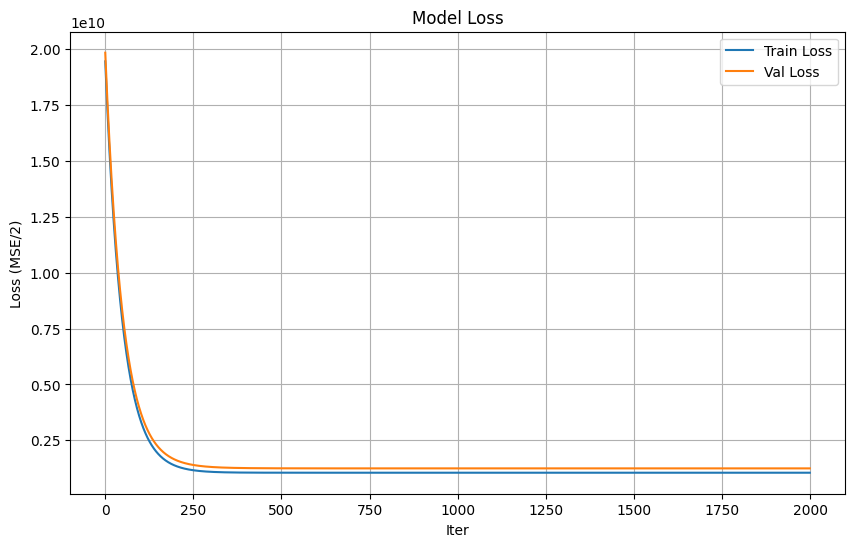

In [20]:
# Problem 7 Plotting the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(scratch_lr.loss, label="Train Loss")
plt.plot(scratch_lr.val_loss, label="Val Loss")
plt.xlabel("Iter")
plt.ylabel("Loss (MSE/2)")
plt.title("Model Loss")
plt.legend()
plt.grid(True)
plt.show()


Iteration 0: Loss = 19442791762.85488
Iteration 100: Loss = 17566587810.35779
Iteration 200: Loss = 17381790009.73184
Iteration 300: Loss = 17362466567.175026
Iteration 400: Loss = 17360252877.010006
Iteration 500: Loss = 17359967954.83454
Iteration 600: Loss = 17359926645.979023
Iteration 700: Loss = 17359920045.9568
Iteration 800: Loss = 17359918919.991703
Iteration 900: Loss = 17359918720.316563
Iteration 1000: Loss = 17359918684.15277
Iteration 1100: Loss = 17359918677.530922
Iteration 1200: Loss = 17359918676.31167
Iteration 1300: Loss = 17359918676.086544
Iteration 1400: Loss = 17359918676.044918
Iteration 1500: Loss = 17359918676.037216
Iteration 1600: Loss = 17359918676.035793
Iteration 1700: Loss = 17359918676.035526
Iteration 1800: Loss = 17359918676.03548
Iteration 1900: Loss = 17359918676.03547
Train Loss (No Bias): 17359918676.03547
Validation Loss (No Bias): 17882389481.115326
Train Loss (With Bias): 1053835546.3471336
Validation Loss (With Bias): 1247777447.9439907


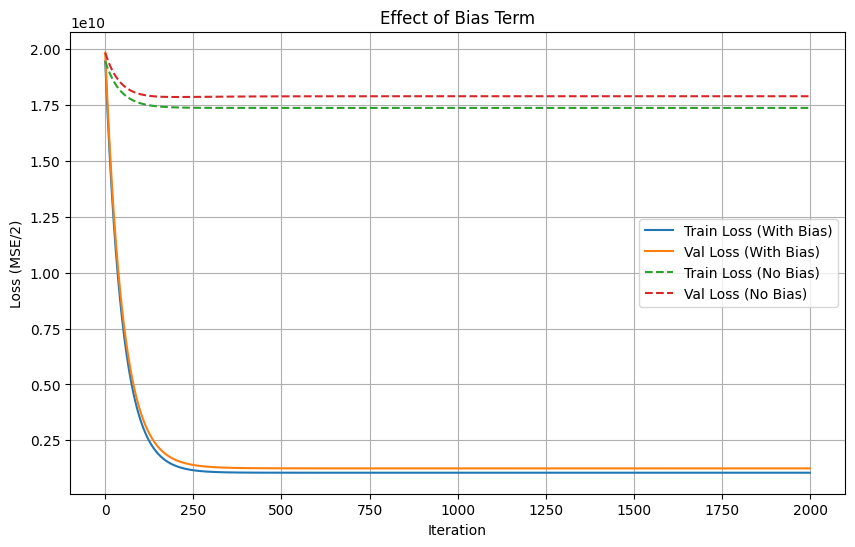

In [21]:
# problem 8: (Advance task) Removal of bias term

# Training scratch model WITHOUT bias
scratch_no_bias = ScratchLinearRegression(num_iter=2000, lr=0.01, no_bias=True, verbose=True)
scratch_no_bias.fit(X_train, y_train, X_val, y_val)

# Final losses
print("Train Loss (No Bias):", scratch_no_bias.loss[-1])
print("Validation Loss (No Bias):", scratch_no_bias.val_loss[-1])

# Comparing with normal model
print("Train Loss (With Bias):", scratch_lr.loss[-1])
print("Validation Loss (With Bias):", scratch_lr.val_loss[-1])

# Visualizing the difference
plt.figure(figsize=(10,6))
plt.plot(scratch_lr.loss, label="Train Loss (With Bias)")
plt.plot(scratch_lr.val_loss, label="Val Loss (With Bias)")
plt.plot(scratch_no_bias.loss, label="Train Loss (No Bias)", linestyle="--")
plt.plot(scratch_no_bias.val_loss, label="Val Loss (No Bias)", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE/2)")
plt.title("Effect of Bias Term")
plt.legend()
plt.grid(True)
plt.show()


As seen above, in no bias, the model cannot fit the data well, so both training and validation loss remain high.

However, in bias, the model can shift the line/plane to better fit the data, leading to much lower loss.

This is an indication that the bias (intercept) is crucial for proper linear regression unless the input features are properly centered around zero.


Iteration 0: Loss = 19442791762.85488
Iteration 100: Loss = 3345093415.7833304
Iteration 200: Loss = 1859510127.196537
Iteration 300: Loss = 1433201398.5254893
Iteration 400: Loss = 1248008000.3800719
Iteration 500: Loss = 1149862619.4528208
Iteration 600: Loss = 1094443126.7486162
Iteration 700: Loss = 1062599314.4772172
Iteration 800: Loss = 1044216119.2225896
Iteration 900: Loss = 1033590003.6601332
Iteration 1000: Loss = 1027445505.4576993
Iteration 1100: Loss = 1023892097.370141
Iteration 1200: Loss = 1021837067.6177008
Iteration 1300: Loss = 1020648577.1403495
Iteration 1400: Loss = 1019961232.1176436
Iteration 1500: Loss = 1019563716.3336495
Iteration 1600: Loss = 1019333818.8946692
Iteration 1700: Loss = 1019200861.055732
Iteration 1800: Loss = 1019123966.8204473
Iteration 1900: Loss = 1019079496.1554282
Final Train Loss (Poly Features): 1019053970.887387
Final Val Loss (Poly Features): 1270790218.3799896


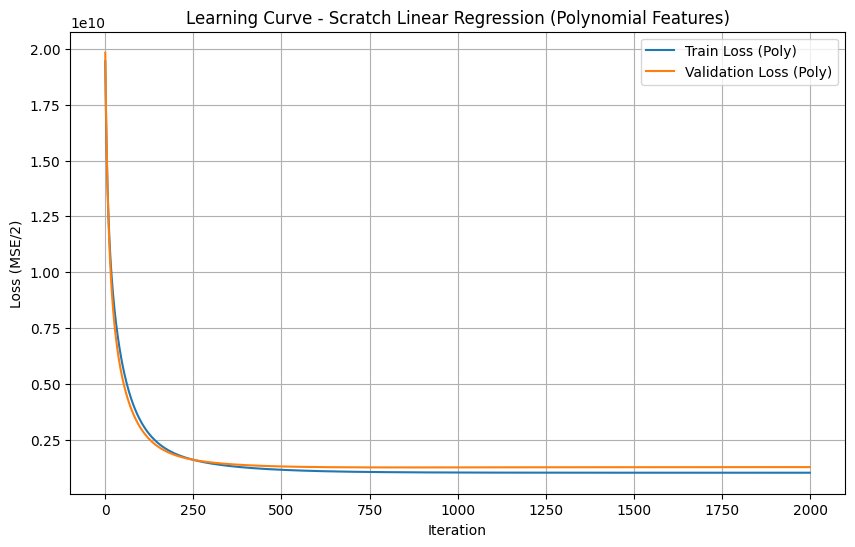

In [22]:
# problem 9: (Advance task) Multidimensional feature quantity

# Creating quadratic terms of my input features
X_poly = np.hstack([
    X_scaled,
    X_scaled[:, 0:1] ** 2,   # Which is GrLivArea²
    X_scaled[:, 1:2] ** 2    # Which is YearBuilt²
])

# Train-test split again
Xp_train, Xp_val, yp_train, yp_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Training ScratchLinearRegression with poly features
scratch_poly = ScratchLinearRegression(num_iter=2000, lr=0.01, verbose=True)
scratch_poly.fit(Xp_train, yp_train, Xp_val, yp_val)

# Final loss
print("Final Train Loss (Poly Features):", scratch_poly.loss[-1])
print("Final Val Loss (Poly Features):", scratch_poly.val_loss[-1])

# Plotting learning curve
plt.figure(figsize=(10,6))
plt.plot(scratch_poly.loss, label="Train Loss (Poly)")
plt.plot(scratch_poly.val_loss, label="Validation Loss (Poly)")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE/2)")
plt.title("Learning Curve - Scratch Linear Regression (Polynomial Features)")
plt.legend()
plt.grid(True)
plt.show()


When I used the square of feature variables (GrLivArea and YearBuilt) as input features, both training and validation losses reduced relative to the training and validation losses using purely the original linear features. This implies that the model could train the data better and better predict on the validation data. The increases in the amount of polynomial factors enabled the model to estimate non-linear patterns in the prices of houses that could not be justified by a linear relationship.

**Problem 10: (Advance task) Derivation of update formula**

Given that theta​ ​J:. =​ ​theta​ ​J-∂​ ​∂​ ​theta​ ​J​ ​J​ ​(theta)θj:=θj−∂∂θjJ(θ),

and objective function (loss) is,

J(θ) = (1/2m) Σ (hθ(x) - y)²

where m is the number of samples,

then computing gradient through partial derivative with respect to θⱼ, we get

∂J/∂θⱼ = (1/m) Σ (h(θ)(xᶦ) − yᶦ) xⱼᶦ

where hθ(x) = X · θ is the linear hypothesis

which measures how much θⱼ affects the loss.

Now, to reduce the loss, we move θ in the opposite direction of the gradient,

θⱼ := θⱼ − α · ∂J/∂θⱼ

that expands to

θⱼ := θⱼ − α · (1/m) Σ (h(θ)(xᶦ) − yᶦ) xⱼᶦ

where α is the learning rate

This ensures we move θ in the direction that reduces the loss.



**problem 11: (Advance task) Problem of local optimum solution**

The loss function J(θ) = (1/2m) Σ (hθ(x) - y)²
is a quadratic function of θ.

Quadratic functions in θ form a convex paraboloid surface.
This means:
 - Any local minimum must be the global minimum.
 - There are no other local dips or bumps.

Therefore, gradient descent always converges to the unique global minimum,
provided a suitable learning rate and sufficient iterations.

